In [1]:
#S&P 500 = An index that represents the average performance of the 500 largest publicly traded companies in the United States.
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# S&P 500 verisi (son 10 yıl)
sp500 = yf.download("^GSPC", period="10y")  # veya start="2015-11-18", end="2025-11-18"
sp500 = sp500[['Close']].rename(columns={'Close': 'SP500'})
sp500.columns=sp500.columns.droplevel(1)
sp500.columns.name=None
sp500

/tmp/ipython-input-3821983075.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", period="10y")  # veya start="2015-11-18", end="2025-11-18"
[*********************100%***********************]  1 of 1 completed


,SP500
Date,
2015-11-18,2083.580078
2015-11-19,2081.239990
2015-11-20,2089.169922
2015-11-23,2086.590088
2015-11-24,2089.139893
...,...
2025-11-11,6846.609863
2025-11-12,6850.919922
2025-11-13,6737.490234


In [2]:
#https://fred.stlouisfed.org/series/JTSJOL
#download JTSJOL.csv

import pandas as pd

jolts = pd.read_csv("JTSJOL.csv")  # indirdiğin dosya adı
jolts['observation_date'] = pd.to_datetime(jolts['observation_date'])
jolts = jolts.rename(columns={'observation_date': 'Date', 'JTSJOL': 'Job_Openings'})
#last 10 years
jolts_10y = jolts[jolts['Date'] >= '2015-11-18']
jolts_10y.set_index('Date', inplace=True)
jolts_10y

,Job_Openings
Date,
2015-12-01,5845
2016-01-01,6012
2016-02-01,5770
2016-03-01,6129
2016-04-01,5803
...,...
2025-04-01,7395
2025-05-01,7712
2025-06-01,7357


In [3]:
jolts_10y.index

DatetimeIndex(['2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01',
               ...
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
               '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01',
               '2025-07-01', '2025-08-01'],
              dtype='datetime64[ns]', name='Date', length=117, freq=None)

In [4]:
sp500_m = sp500.resample('M').last()
sp500_m

/tmp/ipython-input-2384274290.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_m = sp500.resample('M').last()


,SP500
Date,
2015-11-30,2080.409912
2015-12-31,2043.939941
2016-01-31,1940.239990
2016-02-29,1932.229980
2016-03-31,2059.739990
...,...
2025-07-31,6339.390137
2025-08-31,6460.259766
2025-09-30,6688.459961


In [5]:
sp500_m.index

DatetimeIndex(['2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31',
               ...
               '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31',
               '2025-06-30', '2025-07-31', '2025-08-31', '2025-09-30',
               '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', name='Date', length=121, freq='ME')

In [6]:
from pandas.tseries.offsets import MonthEnd

jolts_m = jolts_10y.copy()
jolts_m.index = jolts_m.index + MonthEnd(0)

print(f'sp500_m index: {sp500_m.index}\n')

print(f'jolts_m index: {jolts_m.index}\n')


sp500_m index: DatetimeIndex(['2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31',
               ...
               '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31',
               '2025-06-30', '2025-07-31', '2025-08-31', '2025-09-30',
               '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', name='Date', length=121, freq='ME')

jolts_m index: DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30',
               ...
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
               '2025-07-31', '2025-08-31'],
              dtype='datetime64[ns]', name='Date', length=117, freq=None)



In [7]:
common_start = max(sp500_m.index.min(), jolts_m.index.min())
common_end   = min(sp500_m.index.max(), jolts_m.index.max())

sp500_cut = sp500_m.loc[common_start:common_end]

df = sp500_cut.join(jolts_m, how='inner')
print(len(sp500_cut), len(jolts_m), len(df))
print(df.head())

117 117 117
                  SP500  Job_Openings
Date                                 
2015-12-31  2043.939941          5845
2016-01-31  1940.239990          6012
2016-02-29  1932.229980          5770
2016-03-31  2059.739990          6129
2016-04-30  2065.300049          5803


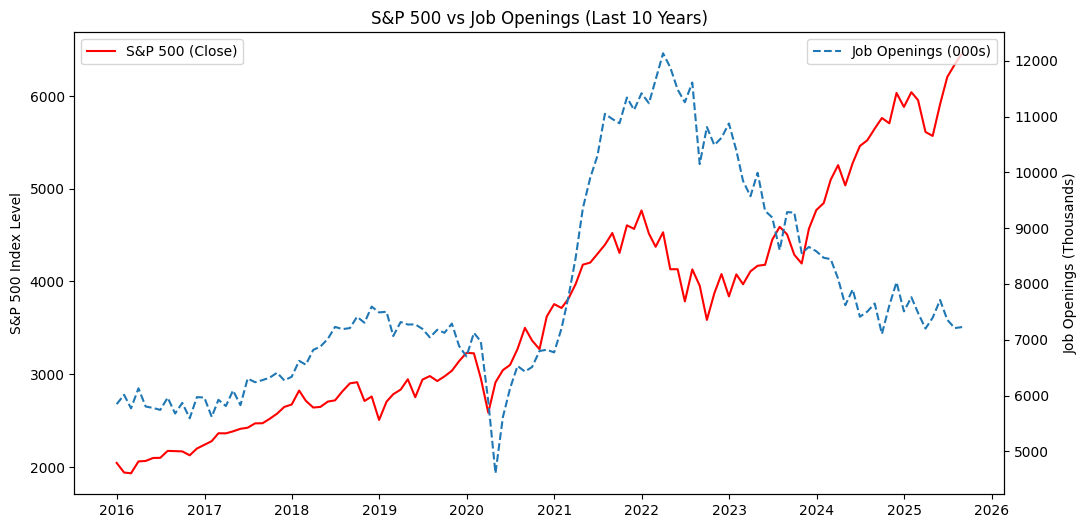

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['SP500'], label='S&P 500 (Close)',color='red')
ax1.set_ylabel('S&P 500 Index Level')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df.index, df['Job_Openings'], label='Job Openings (000s)', linestyle='--')
ax2.set_ylabel('Job Openings (Thousands)')
ax2.legend()

plt.title('S&P 500 vs Job Openings (Last 10 Years)')
plt.legend()
plt.savefig('S&P 500 vs Job Openings (Last 10 Years).png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip uninstall -y prophet pystan
!pip install prophet cmdstanpy

The MAPE for the model is 0.051

The Accuracy for the model is 99.949

            ds         yhat   yhat_lower   yhat_upper
121 2025-12-31  6523.953868  5823.775323  7197.435785
122 2026-01-31  6714.278732  6071.886776  7453.963643
123 2026-02-28  6716.072783  6100.380881  7370.795978
124 2026-03-31  6753.788603  6129.308300  7427.917959
125 2026-04-30  6781.510500  6128.525552  7433.862076
126 2026-05-31  6798.609734  6182.924802  7420.282144
127 2026-06-30  6977.992340  6267.506675  7680.770977
128 2026-07-31  7149.208894  6478.536089  7761.093395
129 2026-08-31  7203.485514  6567.082284  7825.929422
130 2026-09-30  7175.593619  6547.694609  7812.307394
131 2026-10-31  7250.467495  6637.111415  7911.846863
132 2026-11-30  7425.387719  6730.665026  8129.425427


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


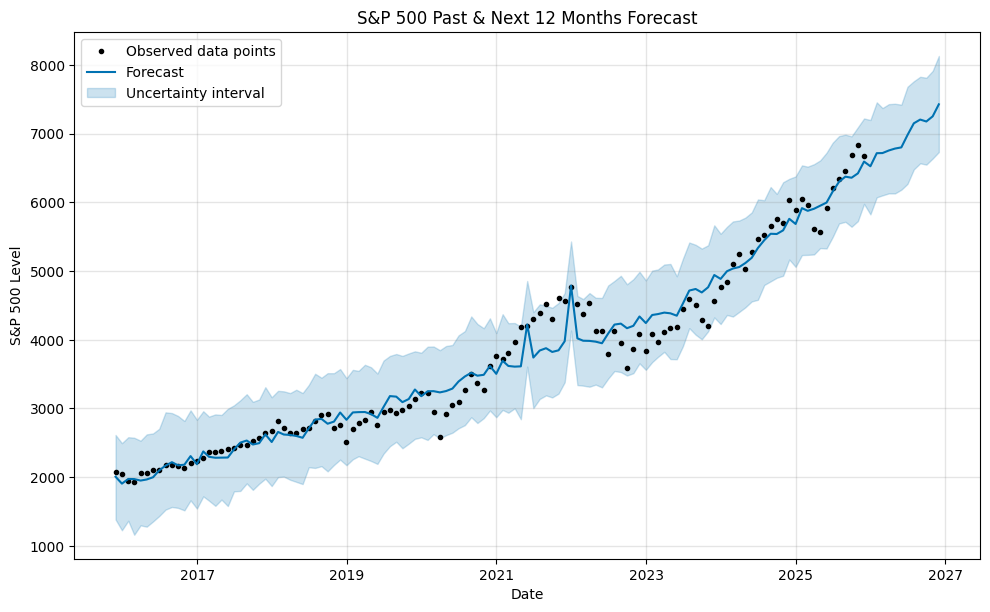

In [14]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import random
import numpy as np

# Prophet için format: ds (tarih), y (değer)
sp_df = sp500_m.reset_index()
sp_df = sp_df.rename(columns={'Date': 'ds', 'SP500': 'y'})

# Model


random.seed(42)
np.random.seed(42)

#Add seasonality and holiday effect
sp_model = Prophet(
    interval_width=0.99,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    mcmc_samples=0
)
sp_model.add_country_holidays('US')

sp_model.fit(sp_df)

forecast = sp_model.predict(sp_df)
performance = pd.merge(sp_df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

#Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {round(performance_MAPE,3)}\n')

Accuracy=100-performance_MAPE
print(f'The Accuracy for the model is {round(Accuracy,3)}\n')

# Gelecek 12 ay için (ay sonu) future dataframe
sp_future = sp_model.make_future_dataframe(periods=12, freq='M')
sp_forecast = sp_model.predict(sp_future)

# Sonuçların son kısmına bakalım
print(sp_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

# Grafik: geçmiş + forecast
fig1 = sp_model.plot(sp_forecast)
plt.title("S&P 500 Past & Next 12 Months Forecast")
plt.xlabel("Date")
plt.ylabel("S&P 500 Level")
plt.legend()
plt.savefig('S&P 500 Past & Next 12 Months Forecast.png')
plt.show()



In [22]:
import plotly.graph_objects as go


cutoff_date = sp_df['ds'].max()

past = sp_forecast[sp_forecast['ds'] <= cutoff_date]
future = sp_forecast[sp_forecast['ds'] >= cutoff_date]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=past['ds'], y=past['yhat'],
    mode='lines', name='Prediction For The Past',
    line=dict(color='black', width=2)
))

fig.add_trace(go.Scatter(
    x=future['ds'], y=future['yhat'],
    mode='lines', name='Prediction For The Future',
    line=dict(color='green', width=2)
))

fig.add_trace(go.Scatter(
    x=sp_forecast['ds'], y=sp_forecast['yhat_upper'],
    mode='lines', name='Upper Limit',
    line=dict(color='grey', dash='dot')
))

fig.add_trace(go.Scatter(
    x=sp_forecast['ds'], y=sp_forecast['yhat_lower'],
    mode='lines', name='Lower Limit',
    line=dict(color='grey', dash='dot')
))

fig.update_layout(
    title="S&P 500 Past & Next 12 Months Forecast",
    xaxis_title="Date",
    yaxis_title="S&P 500 Level",
    width=1000,
    height=500
)

fig.show()

The MAPE for the model is 0.09361113870022048

The Accuracy for the model is 99.90638886129977



/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



            ds         yhat   yhat_lower    yhat_upper
117 2025-09-30  7521.640829  4917.641514  10290.584711
118 2025-10-31  7459.565002  4618.088902  10214.074273
119 2025-11-30  7453.458875  5075.765616  10167.615243
120 2025-12-31  7142.131577  4651.181352   9734.743330
121 2026-01-31  7368.223766  4596.444582  10055.391891
122 2026-02-28  7212.632991  4405.762269   9743.159814
123 2026-03-31  7143.856783  4649.098160   9952.761800
124 2026-04-30  7053.277838  4554.568460   9611.119897
125 2026-05-31  6904.553081  4360.920685   9539.479823
126 2026-06-30  6968.374894  4320.229438   9683.831212
127 2026-07-31  6955.067956  4347.308105   9518.117840
128 2026-08-31  6812.741136  4287.249761   9561.307358


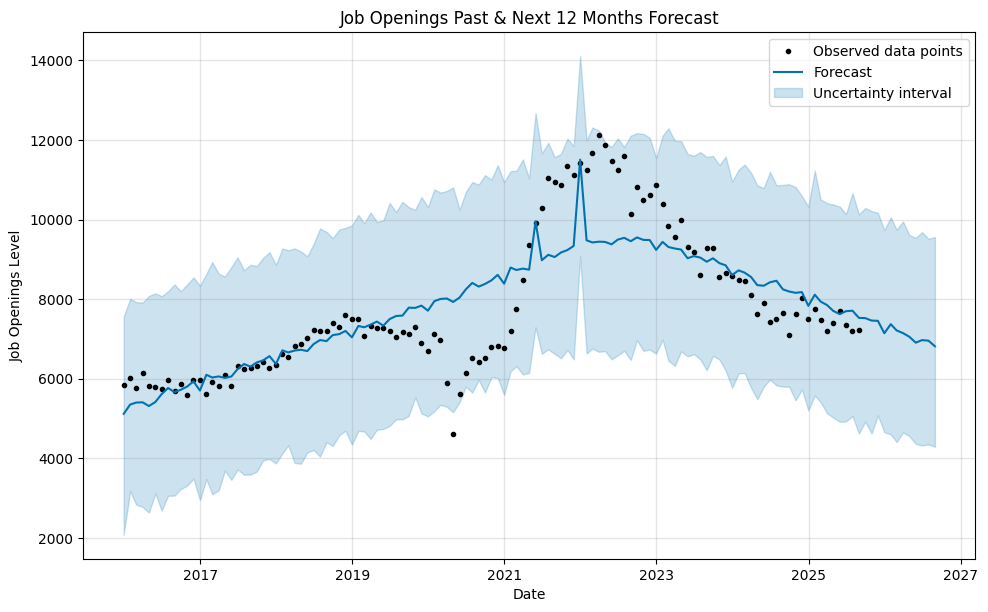

In [17]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import random
import numpy as np

# Prophet için format: ds (tarih), y (değer)
jolts_df = jolts_m.reset_index()
jolts_df = jolts_df.rename(columns={'Date': 'ds', 'Job_Openings': 'y'})
# Model


random.seed(42)
np.random.seed(42)

#Add seasonality and holiday effect
job_model = Prophet(
    interval_width=0.99,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    mcmc_samples=0
)
job_model.add_country_holidays('US')

job_model.fit(jolts_df)

forecast = job_model.predict(jolts_df)
performance = pd.merge(jolts_df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

#Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}\n')

Accuracy=100-performance_MAPE
print(f'The Accuracy for the model is {Accuracy}\n')

# Gelecek 12 ay için (ay sonu) future dataframe
job_future = job_model.make_future_dataframe(periods=12, freq='M')
job_forecast = job_model.predict(job_future)

# Sonuçların son kısmına bakalım
print(job_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

# Grafik: geçmiş + forecast
fig1 = job_model.plot(job_forecast)
plt.title("Job Openings Past & Next 12 Months Forecast")
plt.xlabel("Date")
plt.ylabel("Job Openings Level")
plt.legend()
plt.savefig('Job Openings Past & Next 12 Months Forecast.png')
plt.show()


In [21]:
import plotly.graph_objects as go


cutoff_date = jolts_df['ds'].max()

past = job_forecast[job_forecast['ds'] <= cutoff_date]
future = job_forecast[job_forecast['ds'] >= cutoff_date]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=past['ds'], y=past['yhat'],
    mode='lines', name='Prediction For The Past',
    line=dict(color='black', width=2)
))

fig.add_trace(go.Scatter(
    x=future['ds'], y=future['yhat'],
    mode='lines', name='Prediction For The Future',
    line=dict(color='green', width=2)
))

fig.add_trace(go.Scatter(
    x=job_forecast['ds'], y=job_forecast['yhat_upper'],
    mode='lines', name='Upper Limit',
    line=dict(color='grey', dash='dot')
))

fig.add_trace(go.Scatter(
    x=job_forecast['ds'], y=job_forecast['yhat_lower'],
    mode='lines', name='Lower Limit',
    line=dict(color='grey', dash='dot')
))

fig.update_layout(
    title="Job Openings Past & Next 12 Months Forecast (Prophet)",
    xaxis_title="Date",
    yaxis_title="Job Openings Level",
    width=1000,
    height=500
)

fig.show()

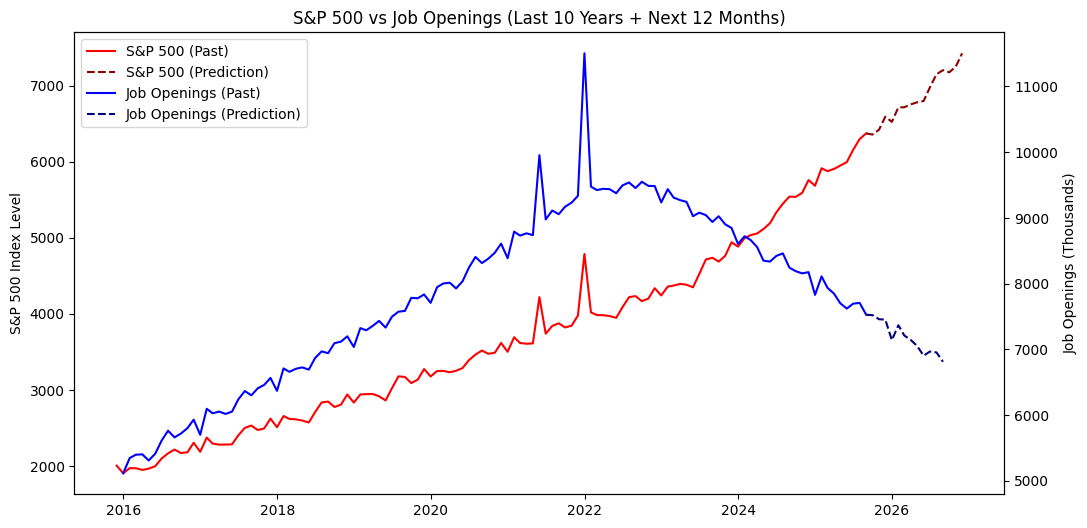

In [20]:
import matplotlib.pyplot as plt

# 1) Geçmiş dönemin son tarihi (joint dataframe üzerinden)
cutoff = df.index.max()

# 2) SP500 forecast serisini index'e al
sp_all = sp_forecast.set_index('ds')['yhat']

sp_hist = sp_all[sp_all.index <= cutoff]   # geçmiş tahmin (in-sample)
sp_fut  = sp_all[sp_all.index >=  cutoff]   # gelecek 12 ay tahmini

# 3) Job Openings forecast serisini index'e al
jolts_all = job_forecast.set_index('ds')['yhat']

jolts_hist = jolts_all[jolts_all.index <= cutoff]
jolts_fut  = jolts_all[jolts_all.index >=  cutoff]

# 4) Grafik: geçmiş + gelecek aynı figürde
fig, ax1 = plt.subplots(figsize=(12, 6))

# S&P 500 – geçmiş ve forecast
ax1.plot(sp_hist.index, sp_hist, label='S&P 500 (Past)', color='red')
ax1.plot(sp_fut.index,  sp_fut,  label='S&P 500 (Prediction)', color='darkred', linestyle='--')
ax1.set_ylabel('S&P 500 Index Level')

ax2 = ax1.twinx()

# Job Openings – geçmiş ve forecast
ax2.plot(jolts_hist.index, jolts_hist, label='Job Openings (Past)', color='blue')
ax2.plot(jolts_fut.index,  jolts_fut,  label='Job Openings (Prediction)', linestyle='--', color='navy')
ax2.set_ylabel('Job Openings (Thousands)')

plt.title('S&P 500 vs Job Openings (Last 10 Years + Next 12 Months)')

# Ortak legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.savefig('S&P 500 vs Job Openings (Last 10 Years + Next 12 Months).png')
plt.show()
